<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [0]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [3]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

In [0]:
df = df.dropna()

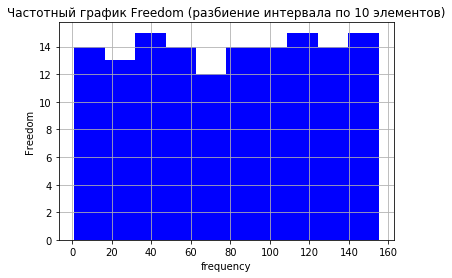

In [8]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(df['Freedom'], 10, facecolor='b')

plt.xlabel('frequency')
plt.ylabel('Freedom')
plt.title('Частотный график Freedom (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

Частоный график Freedom близок к прямоугольному или раномерному распределению

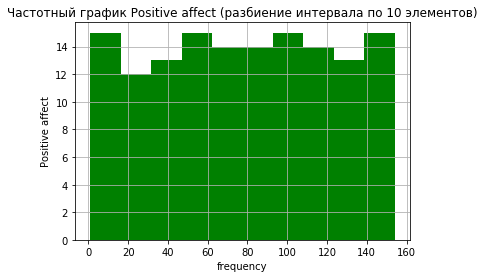

In [12]:
n, bins, patches = plt.hist(df['Positive affect'], 10, facecolor='g')
plt.xlabel('frequency')
plt.ylabel('Positive affect')
plt.title('Частотный график Positive affect (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

Частоный график Positive affect близок к прямоугольному или раномерному распределению

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [15]:
#медиана
# Извлекаем Freedom 
freedom = df['Freedom']

# Находим количество в колонке Freeedom
num_freedom = len(freedom)

# Сортируем в порядке возрастания
sorted_freedom = sorted(freedom)

# Ищем индекс среднего элемента
# если количество элементов четное, то берем среднее двух элементов в середине
middle = (num_freedom // 2)
if num_freedom%2==0:
  result = (sorted_freedom[middle-1] + sorted_freedom[middle])/2
else:
  result = sorted_freedom[middle]
# Находим медиану
print('Медиана: ', result)

Медиана:  79.5


In [16]:
len(sorted_freedom)

140

In [17]:
import statistics
print('Медиана: ', statistics.median(df['Freedom']))

Медиана:  79.5


Почему нельзя найти моду?

In [18]:
# Создаём пустой словарь, в котором будем считать количество появлений значений Freedom
freedom_counts = {}
for p in freedom:
    if p not in freedom_counts:
        freedom_counts[p] = 1
    else:
        freedom_counts[p] += 1

# Проходимся по словарю и ищем максимальное количество повторений
# Алгоритм поиска максимума
maxp = 0
mode_freedom = None
for k, v in freedom_counts.items():
    if maxp < v:
        maxp = v
        mode_freedom = k
print('Значение моды: ', mode_freedom, 'Количество встречаемости: ', maxp)

Значение моды:  5.0 Количество встречаемости:  1


In [19]:
print('Значение моды: ', statistics.mode(freedom))

StatisticsError: ignored

# Нельзя найти Моду т.к. нет повторяющихся чисел

**Математическое ожидание**

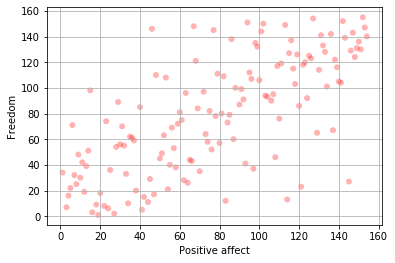

In [21]:
pos_affect = df['Positive affect']
freedom = df['Freedom']
fig, ax = plt.subplots()
ax.scatter(pos_affect, freedom, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('Positive affect')
plt.ylabel('Freedom')
plt.show()

In [23]:
statistics.mean(df['Freedom'])

78.82857142857142

In [25]:
sum(df['Freedom'])/len(df['Freedom'])

78.82857142857142

**Стандартное отклонение**

In [26]:
freedom = df['Freedom']
statistics.pstdev(freedom)

44.9475794449399

In [27]:
def stdev(nums):
    diffs = 0
    avg = sum(nums)/len(nums)
    for n in nums:
        diffs += (n - avg)**(2)
    return (diffs/(len(nums)-1))**(0.5)

print(stdev(freedom))

45.108971631877274


**Дисперсия**

In [28]:
statistics.pvariance(freedom)

2020.2848979591836

In [30]:
44.9475794449399**2

2020.2848979591836

**Минимум и максимум**

In [32]:
min(freedom)

1.0

In [31]:
max(freedom)

155.0

**Выбросы (если есть)**

In [0]:
freedom.isnull().sum()

0

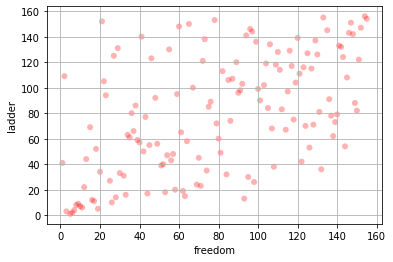

In [33]:
freedom = df['Freedom']
ladder = df['Ladder']
fig, ax = plt.subplots()
ax.scatter(freedom, ladder, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('freedom')
plt.ylabel('ladder')
plt.show()

**Размах**

In [0]:
freedom_range = max(freedom) - min(freedom)
print(freedom_range)

154.0


Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

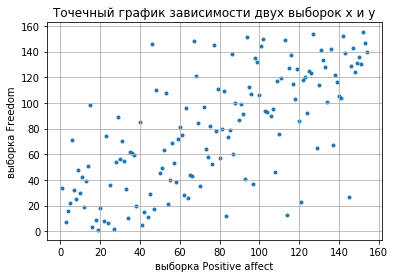

In [34]:
pos_affect = df['Positive affect']
freedom = df['Freedom']
plt.xlabel('выборка Positive affect')
plt.ylabel('выборка Freedom')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(pos_affect, freedom, marker='.')

Приступая к расчетам коэффициента корреляции r-Пирсона у нас выполнены следующие условия:

- Переменные Freedom и Possitive affect распределены нормально.
- Исследуемые переменные Freedom и Possitive affect измерены в интервальной шкале или шкале отношений.
- Количество значений в исследуемых переменных одинаковы.

In [40]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(pos_affect, freedom)
print(corr)

0.6965670458090685


**Коэффициент говорит о зависимости переменных, т.к. он ближе к 1**

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [42]:
print(statistics.mean(freedom))

78.82857142857142


Центрирование

In [41]:
freedom_1 = freedom - statistics.mean(freedom)
print(statistics.mean(freedom_1))

6.496390726949487e-15


Масштабирование выборки

In [36]:
min(freedom_1)

-77.82857142857142

In [37]:
max(freedom_1)

76.17142857142858

In [38]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_2 = min_max_scaler.fit_transform(np.array(freedom_1).reshape(-1, 1))
print(min(freedom_2))
print(max(freedom_2))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

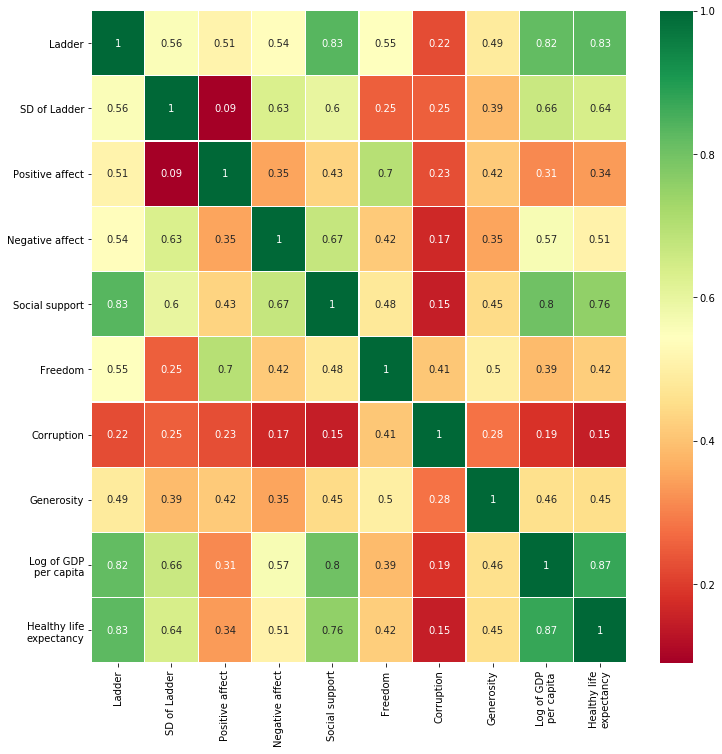

In [43]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

В данном датасете некоторые атрибуты значительно коррелируют. Какие? Почему?

**Аттрибуты Ladder, Healthy life expectancy, Log of GDP per capita и Social support значительно коррелируют. Так как они в большей степени влияют на расчет показателя счастья, удовлетворенности людей.**

Загрузить таблицу цен на авокадо: 

In [44]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

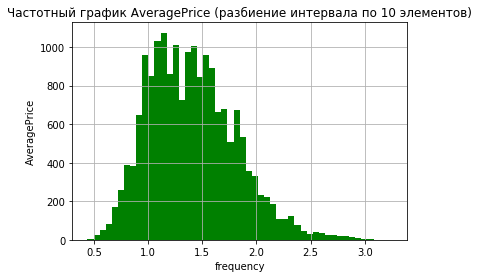

In [48]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(df['AveragePrice'], 10, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('AveragePrice')
plt.title('Частотный график AveragePrice (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

**Распределение близко к нормальному**

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [0]:
df_corr = df[['4046','4225','4770','AveragePrice']]

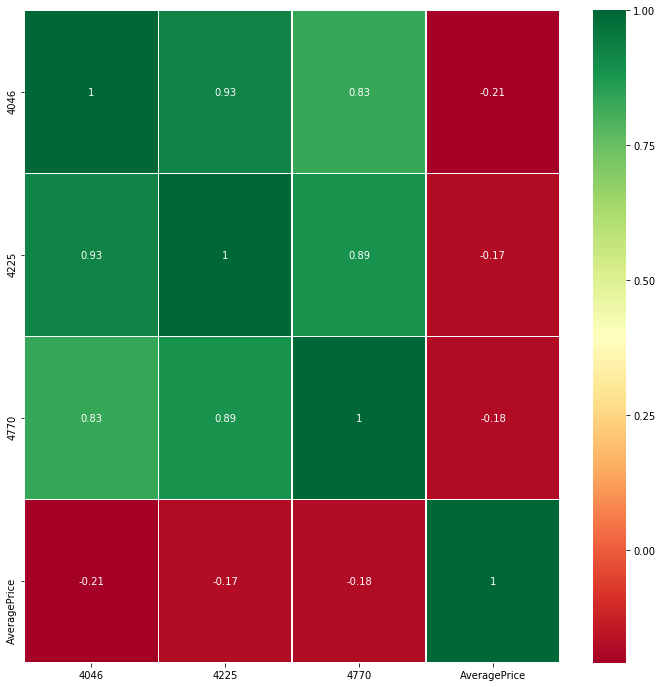

In [50]:
sns.heatmap(df_corr.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

**Есть прямая корреляция между количеством разных кодов авокадо, но нет между количеством и средней ценой. Таким образом количество никак не влияет на среднюю цену.**

Для подтверждения этой гипотезы рассчитаем коэффициент Пирсона для количества авокадо кода 4046 и средней цены

In [51]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df[['4046', 'AveragePrice']])
df_norm = pd.DataFrame(np_scaled)
print(df_norm[:5])

          0         1
0  0.000046  0.316726
1  0.000030  0.323843
2  0.000035  0.174377
3  0.000050  0.227758
4  0.000041  0.298932


In [0]:
volume = df_norm[0]
av_price = df_norm[1]

In [0]:
from scipy.stats import pearsonr

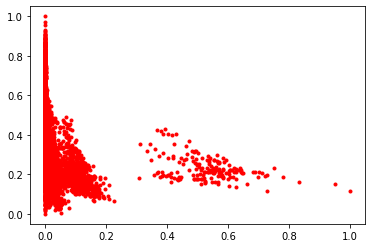

In [54]:
plt.plot(volume, av_price, 'r.')
plt.show()

In [56]:
corr, p_value = pearsonr(volume, av_price)
print(corr)

-0.20831704848788482


**Мы видим, что коэффициент близок к 0 и это говорит нам о независимости переменных**

Написать временные предсказания цен на авокадо типа organic для выбранного региона: LasVegas, начиная с августа 2017 года до конца марта 2018. В качестве тренировочных данных использовать данные до июля 2017 года включительно.
В качестве примера использовать лекционный материал в lecture_1.ipynb

In [98]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [0]:
PREDICTION_TYPE = 'organic'
df_conv = df[df.type == PREDICTION_TYPE]

In [0]:
regions = df_conv.groupby(df_conv.region)

In [0]:
PREDICTING_FOR = "LasVegas"
date_price = regions.get_group(PREDICTING_FOR)[['Date', 'AveragePrice']].reset_index(drop=True)

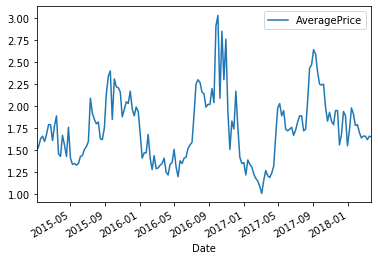

In [66]:
date_price.plot(x='Date', y='AveragePrice', kind="line")

In [0]:
date_price = date_price.rename(columns={'Date':'ds', 'AveragePrice':'y'})

In [0]:
date_price = date_price.sort_values(by='ds')

In [0]:
#amount_80 = int(len(date_price)*0.8)
test_price = date_price[(date_price['ds'] >= '2017-08-01') & (date_price['ds'] <= '2018-03-31')]
train_price = date_price[(date_price['ds'] >= '2015-01-01') & (date_price['ds'] <= '2017-07-31')]

In [119]:
train_price.head()

,ds,y
51,2015-01-04,1.50
50,2015-01-11,1.54
49,2015-01-18,1.63
48,2015-01-25,1.66
47,2015-02-01,1.60


In [120]:
train_price.tail()

,ds,y
130,2017-07-02,1.73
129,2017-07-09,1.82
128,2017-07-16,1.89
127,2017-07-23,1.89
126,2017-07-30,1.72


In [121]:
test_price.head()

,ds,y
125,2017-08-06,1.74
124,2017-08-13,2.05
123,2017-08-20,2.43
122,2017-08-27,2.47
121,2017-09-03,2.64


In [122]:
test_price.tail()

,ds,y
161,2018-02-25,1.66
160,2018-03-04,1.66
159,2018-03-11,1.62
158,2018-03-18,1.66
157,2018-03-25,1.65


In [123]:
from fbprophet import Prophet
m = Prophet()
m.fit(train_price)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future = m.make_future_dataframe(periods=240)
forecast = m.predict(future)

In [125]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.784357,1.205262,1.817275,1.784357,1.784357,-0.279660,-0.279660,-0.279660,-0.279660,-0.279660,-0.279660,0.0,0.0,0.0,1.504697
1,2015-01-11,1.783789,1.225860,1.772643,1.783789,1.783789,-0.285251,-0.285251,-0.285251,-0.285251,-0.285251,-0.285251,0.0,0.0,0.0,1.498538
2,2015-01-18,1.783221,1.207902,1.815704,1.783221,1.783221,-0.278036,-0.278036,-0.278036,-0.278036,-0.278036,-0.278036,0.0,0.0,0.0,1.505185
3,2015-01-25,1.782653,1.226115,1.802835,1.782653,1.782653,-0.275815,-0.275815,-0.275815,-0.275815,-0.275815,-0.275815,0.0,0.0,0.0,1.506838
4,2015-02-01,1.782084,1.227024,1.801061,1.782084,1.782084,-0.276079,-0.276079,-0.276079,-0.276079,-0.276079,-0.276079,0.0,0.0,0.0,1.506006


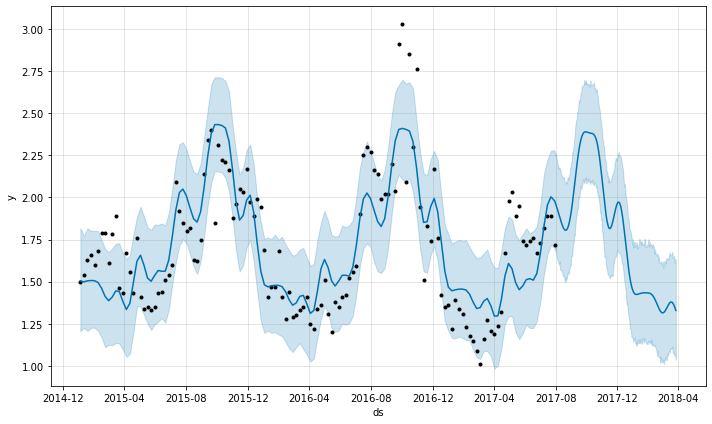

In [126]:
fig1 = m.plot(forecast)

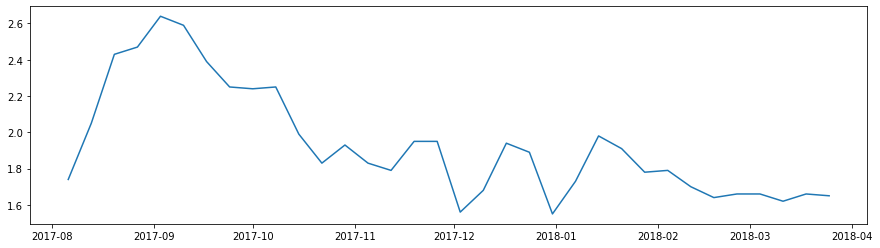

In [127]:
plt.figure(figsize=(15,4))
plt.plot(test_price['ds'], test_price['y'])
plt.show()

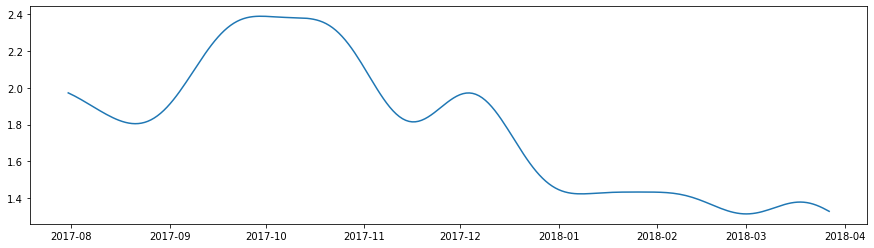

In [128]:
plt.figure(figsize=(15,4))
forecast_future = forecast.iloc[135:,:]
plt.plot(forecast_future['ds'], forecast_future['yhat'])
plt.show()

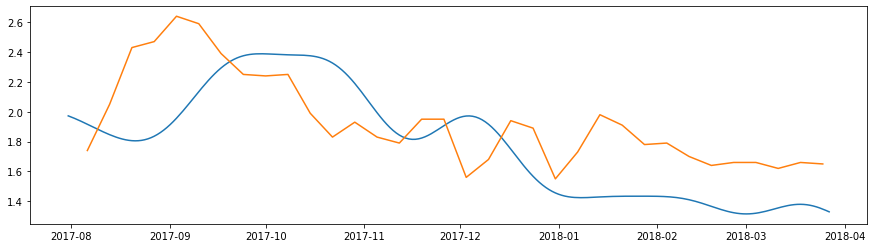

In [129]:
plt.figure(figsize=(15,4))
forecast_future = forecast.iloc[135:,:]
plt.plot(forecast_future['ds'], forecast_future['yhat'])
plt.plot(test_price['ds'], test_price['y'])
plt.show()

**модель требует доработки**